### Taxi Fare Prediction

In [7]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [8]:
vicky = pd.read_csv(r"C:\Users\Vicky Yewle\Downloads\Machine Learning\Datasets\TaxiFarePrediction (1)\Taxi Fare Prediction\Dataset\TaxiFare.csv")
vicky.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [9]:
vicky.shape

(50000, 8)

In [10]:
vicky.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [11]:
vicky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


### Data cleansing

In [12]:
vicky= vicky.drop(vicky[vicky["amount"]<2.5].index ,axis =0)
vicky.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,49990.000000,49990.000000,49990.000000,49990.000000,49990.000000,49990.000000
mean,11.366813,-72.509468,39.933598,-72.505803,39.926903,1.667914
std,9.684697,10.394880,6.225469,10.403539,6.012677,1.289250
min,2.500000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734883,-73.991152,40.734375,1.000000
50%,8.500000,-73.981840,40.752679,-73.980082,40.753373,1.000000
75%,12.500000,-73.967155,40.767360,-73.963588,40.768166,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [13]:
vicky = vicky[vicky.no_of_passenger >  0]
vicky.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000
mean,11.373278,-72.510557,39.934170,-72.506897,39.927450,1.673437
std,9.693535,10.391455,6.225322,10.400148,6.011808,1.287799
min,2.500000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000
25%,6.000000,-73.992066,40.734890,-73.991151,40.734378,1.000000
50%,8.500000,-73.981838,40.752685,-73.980087,40.753377,1.000000
75%,12.500000,-73.967145,40.767365,-73.963620,40.768163,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [14]:
vicky=vicky[vicky.latitude_of_pickup<180]
vicky.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,49824.000000,49824.000000,49824.000000,49824.000000,49824.000000,49824.000000
mean,11.373440,-72.510528,39.926921,-72.506868,39.927433,1.673451
std,9.693565,10.391557,6.011449,10.400250,6.011867,1.287809
min,2.500000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000
25%,6.000000,-73.992066,40.734890,-73.991151,40.734378,1.000000
50%,8.500000,-73.981839,40.752685,-73.980087,40.753376,1.000000
75%,12.500000,-73.967148,40.767364,-73.963624,40.768162,2.000000
max,200.000000,40.783472,43.098708,40.851027,43.415190,6.000000


In [15]:
def Dist_cal(x1,x2,y1,y2):
    result= ((((x2-x1)**2)+((y2-y1)**2))**0.5)
    return result

In [16]:
vicky['distance'] = abs(Dist_cal(vicky.longitude_of_pickup,vicky.latitude_of_pickup,vicky.longitude_of_dropoff,vicky.latitude_of_dropoff)-abs((Dist_cal(vicky.longitude_of_pickup,vicky.latitude_of_pickup,vicky.longitude_of_dropoff,vicky.latitude_of_dropoff)).mean()))
vicky['distance'].describe()

count    49824.000000
mean         6.001046
std         21.025100
min          1.216673
25%          3.058783
50%          3.072030
75%          3.085925
max        159.184683
Name: distance, dtype: float64

<AxesSubplot:>

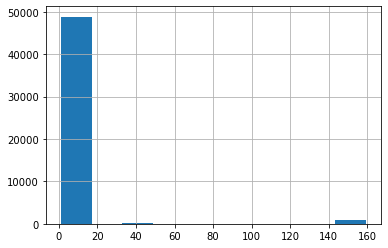

In [17]:
vicky['distance'].hist()

<AxesSubplot:>

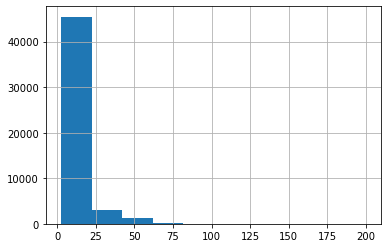

In [18]:
vicky['amount'].hist()

<AxesSubplot:>

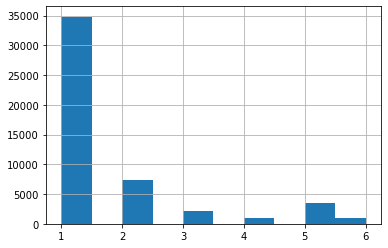

In [19]:
vicky['no_of_passenger'].hist()

In [20]:
vicky=vicky[vicky.distance<20]
vicky.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance
count,48823.000000,48823.000000,48823.000000,48823.000000,48823.000000,48823.000000,48823.000000
mean,11.369209,-73.930494,40.706286,-73.929562,40.705978,1.674805,3.062434
std,9.664975,2.263201,2.262998,2.263764,2.271409,1.288961,0.089688
min,2.500000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000,1.216673
25%,6.000000,-73.992302,40.736477,-73.991328,40.735873,1.000000,3.058445
50%,8.500000,-73.982117,40.753419,-73.980476,40.754102,1.000000,3.071544
75%,12.500000,-73.968353,40.767763,-73.965296,40.768473,2.000000,3.084851
max,200.000000,40.783472,43.098708,40.851027,43.415190,6.000000,17.927316


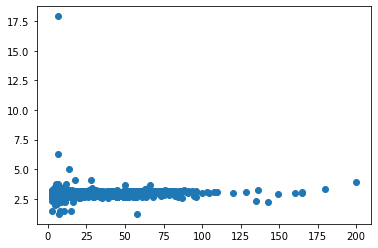

In [21]:
import matplotlib.pyplot as plt
plt.scatter(vicky['amount'],vicky['distance'])

In [22]:
vicky.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48823 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             48823 non-null  object 
 1   amount                48823 non-null  float64
 2   date_time_of_pickup   48823 non-null  object 
 3   longitude_of_pickup   48823 non-null  float64
 4   latitude_of_pickup    48823 non-null  float64
 5   longitude_of_dropoff  48823 non-null  float64
 6   latitude_of_dropoff   48823 non-null  float64
 7   no_of_passenger       48823 non-null  int64  
 8   distance              48823 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.7+ MB


In [23]:
vicky.date_time_of_pickup = pd.to_datetime(vicky.date_time_of_pickup,utc = True, infer_datetime_format= True)
vicky.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48823 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             48823 non-null  object             
 1   amount                48823 non-null  float64            
 2   date_time_of_pickup   48823 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   48823 non-null  float64            
 4   latitude_of_pickup    48823 non-null  float64            
 5   longitude_of_dropoff  48823 non-null  float64            
 6   latitude_of_dropoff   48823 non-null  float64            
 7   no_of_passenger       48823 non-null  int64              
 8   distance              48823 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1), object(1)
memory usage: 3.7+ MB


In [24]:
vicky['Hour']= vicky['date_time_of_pickup'].apply(lambda time: time.hour)
vicky['Month']= vicky['date_time_of_pickup'].apply(lambda time: time.month)
vicky['Day of week']= vicky['date_time_of_pickup'].apply(lambda time: time.dayofweek)
vicky['Year']= vicky['date_time_of_pickup'].apply(lambda time: time.year)
vicky['Date']= vicky['date_time_of_pickup'].apply(lambda time: time.day)

del vicky['date_time_of_pickup']
vicky.head()

,unique_id,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance,Hour,Month,Day of week,Year,Date
0,26:21.0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2.827282,17,6,0,2009,15
1,52:16.0,16.9,-74.016048,40.711303,-73.979268,40.782004,1,3.088280,16,1,1,2010,5
2,35:00.0,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3.086291,0,8,3,2011,18
3,30:42.0,7.7,-73.987130,40.733143,-73.991567,40.758092,1,3.075063,4,4,5,2012,21
4,51:00.0,5.3,-73.968095,40.768008,-73.956655,40.783762,1,3.079720,7,3,1,2010,9


In [25]:
del vicky['unique_id']

In [26]:
vicky.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance,Hour,Month,Day of week,Year,Date
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2.827282,17,6,0,2009,15
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,3.088280,16,1,1,2010,5
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,3.086291,0,8,3,2011,18
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,3.075063,4,4,5,2012,21
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,3.079720,7,3,1,2010,9


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=vicky.drop('amount',axis=1)

Y= vicky['amount']
X_train,X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.30, random_state=100)

X_train.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance,Hour,Month,Day of week,Year,Date
3804,-73.991208,40.756571,-73.979676,40.759633,1,3.087193,6,4,0,2012,30
28095,-73.974914,40.756837,-73.976102,40.760039,1,3.073619,10,6,2,2011,15
46644,-73.960182,40.770537,-73.970862,40.795768,1,3.094451,9,10,5,2014,11
25431,-74.009455,40.721865,-74.006782,40.705757,1,3.056626,21,1,3,2011,13
13385,-73.990472,40.745400,-73.986748,40.751092,1,3.077735,11,7,1,2011,5


In [29]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [30]:
rfr.fit(X_train, Y_train)

RandomForestRegressor()

In [31]:
predictions_train = rfr.predict(X_train)

In [32]:
predictions= rfr.predict(X_test)

In [33]:
#as it is parameter so we use y not Y

from sklearn.metrics import r2_score

print(r2_score(y_true=Y_train,y_pred=predictions_train))

from sklearn.metrics import r2_score

print(r2_score(y_true=Y_test,y_pred=predictions))

0.9700615923579138
0.7310255445409738


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

params = {
    'n_estimators':[100,200,300,500,700,1000],
    "max_features":[6,8,10,12],
    "bootstrap":[True,False],
    "max_depth":[None,5,10,15,20,30,50,70],
    'min_samples_leaf':[1,2,3,4],
    'min_samples_split':[13,14,15,16,17]

}

In [ ]:
random_search = RandomizedSearchCV(reg,cv=7,param_distributions=params,scoring='neg_mean_absolute_error',
                                  n_iter=10, n_jobs=-1, verbose=20)
random_search.fit(X_train,Y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 11

In [ ]:
rf = random_search.best_estimator_

In [ ]:
rf.fit(X_train,Y_train)

In [ ]:
predictions_train = rf.predict(X_train)

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_true=Y_train,y_pred=predictions_train))

from sklearn.metrics import r2_score

print(r2_score(y_true=Y_test,y_pred=predictions))